### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
vehicle_df=pd.read_csv("vehicle.csv")

In [3]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
vehicle_df.dropna(inplace=True)

In [5]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [6]:
vehicle_df.shape

(813, 19)

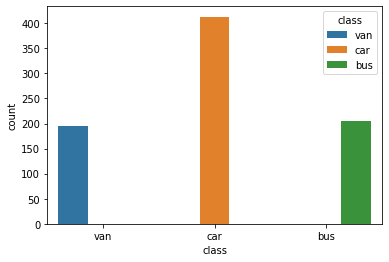

In [7]:
sns.countplot(x="class",data=vehicle_df,hue='class')

### Check for any missing values in the data 

In [8]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 3. Standardize the data 

In [9]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [10]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [11]:
vehicle_data=vehicle_df.drop('class',axis=1)

In [12]:
vehicle_class=vehicle_df['class']

In [13]:
vehicle_data=vehicle_data.apply(zscore)

In [14]:
vehicle_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### 4. Assign a dummy array called distortion

In [15]:
sse_df=np.array([])

You can later use this array to plot the elbow plot

In [16]:
from sklearn.cluster import KMeans

In [17]:
vehicle_data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

### 5. Calculating distortion - C distance

In [18]:
km = KMeans(n_clusters=2)

In [19]:
km.fit(vehicle_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
km.predict(vehicle_data).shape

(813,)

In [31]:
km.cluster_centers_

array([[-0.14704877, -1.03475762, -0.14301432,  0.28618677,  0.29527156,
        -0.26015405, -0.1930472 , -0.03404795, -0.27506671, -1.02805463,
        -0.1152732 , -0.23206155, -1.06925403, -0.63301982, -0.55602137,
         0.80652749,  0.92540162,  0.75308394],
       [ 0.58656879,  0.49536324,  0.80611812,  0.97348021,  0.36337693,
         0.03171317,  0.68095368, -0.84827036,  0.63321946,  0.3235891 ,
         0.72314193,  0.64531518,  0.47580133, -0.46827333, -0.26143398,
        -0.09924151,  0.56268774,  0.48838927],
       [-0.59457845, -0.0513429 , -0.26147576, -0.54163157, -0.05745847,
         0.04925924, -0.4803248 ,  0.38610497, -0.47955436,  0.07701382,
        -0.47518286, -0.53233026, -0.0616481 ,  0.11624853, -0.27814539,
        -0.39237809, -0.51349681, -0.26687025],
       [-0.73302434,  0.07273496, -0.27217095,  2.94768327,  6.8366519 ,
         8.69670551, -0.535008  ,  0.46624777, -0.55740597,  0.28341053,
         1.69752769, -0.58806827,  0.21270086,  4.965

In [32]:
km.inertia_

3652.067513741483

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [33]:
sse_df = pd.DataFrame(columns=['K','SSE'])
for i in range(1,11):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10, max_iter=300)
    
    #Fit on the data
    km.fit(vehicle_data)
    
    #Add cluster information for each record in dataframe
    km.predict(vehicle_data)
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]

### 6. Plotting Elbow/ Scree Plot

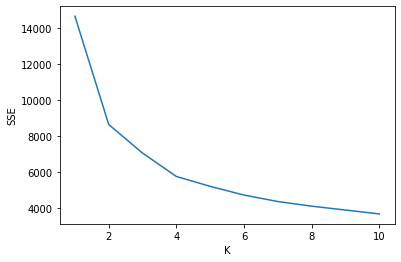

In [34]:
sns.lineplot(x='K', y='SSE', data=sse_df)

In [35]:
sse_df.head()

,K,SSE
0,1.0,14634.000000
1,2.0,8623.136976
2,3.0,7037.467395
3,4.0,5739.201327
4,5.0,5191.298938


Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

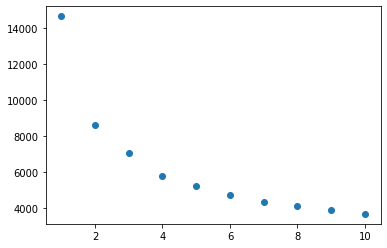

In [38]:
plt.scatter('K','SSE',data=sse_df)

### Find out the optimal value of K

# OPTIMAL K IS "4", IT IS CLEARLY VISIBLE THAT AT K=4, ELBOW IS FORMED AND VALUE IS TILTED

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [82]:
km = KMeans(n_clusters=4)
km.fit(vehicle_data)
km.predict(vehicle_data)
km.cluster_centers_[2]

array([-0.91575841, -0.52240268, -0.88950599, -1.08772789, -0.56197078,
       -0.30001587, -0.77977885,  0.86736419, -0.74593938, -0.48553642,
       -0.80174644, -0.78383683, -0.39057464,  0.78315922, -0.09023857,
       -0.29608966, -1.04774549, -1.10361198])

In [83]:
km.cluster_centers_.shape

(4, 18)

In [84]:
vehicle_data.columns.shape

(18,)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [85]:
centroid_df=pd.DataFrame(data=np.array(km.cluster_centers_),columns=vehicle_data.columns)

In [86]:
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.228397,-0.577113,-0.308062,-0.041242,0.178445,-0.173699,-0.456880,0.321991,-0.485592,-0.539969,-0.421529,-0.461481,-0.605499,-0.642849,-0.062341,0.012963,0.822192,0.705383
1,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
2,-0.915758,-0.522403,-0.889506,-1.087728,-0.561971,-0.300016,-0.779779,0.867364,-0.745939,-0.485536,-0.801746,-0.783837,-0.390575,0.783159,-0.090239,-0.296090,-1.047745,-1.103612
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


### Use kmeans.labels_ function to print out the labels of the classes

In [87]:
km.labels_

array([0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 3, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 3, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 0, 3, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [88]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [91]:
a.shape

(100, 2)

### 9. Combine all three arrays a,b,c into a dataframe

In [108]:
a=pd.DataFrame(a)
b_df=pd.DataFrame(b)
c_df=pd.DataFrame(c)

In [109]:
combine_df=pd.DataFrame()
combine_df=combine_df.append(a_df)
combine_df=combine_df.append(b_df)

In [110]:
combine_df=combine_df.append(c_df)
combine_df.shape

(250, 2)

In [115]:
combine_df.describe()

,0,1
count,250.000000,250.000000
mean,8.062148,11.957980
std,4.286880,10.141812
min,-4.004856,-4.863631
25%,7.248319,0.436326
50%,9.527512,17.736528
75%,10.775114,20.762564
max,14.546610,25.452429


### 10. Use scatter matrix to print all the 3 distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AB09B98198>,
      dtype=object)

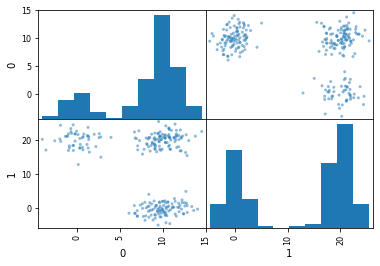

In [113]:
pd.plotting.scatter_matrix(combine_df)

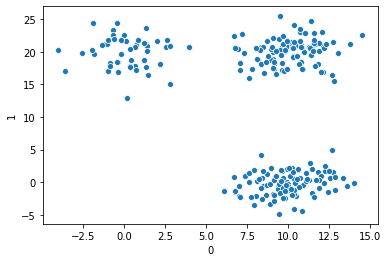

In [117]:
sns.scatterplot(x=0,y=1,data=combine_df)

### 11. Find out the linkage matrix

In [126]:
import scipy.cluster.hierarchy as shc

In [125]:
shc.linkage(combine_df.values, method='ward',metric='euclidean')

array([[5.10000000e+01, 6.30000000e+01, 2.77444306e-02, 2.00000000e+00],
       [2.04000000e+02, 2.40000000e+02, 3.63493956e-02, 2.00000000e+00],
       [1.66000000e+02, 2.31000000e+02, 4.29574086e-02, 2.00000000e+00],
       [1.81000000e+02, 1.87000000e+02, 6.19863747e-02, 2.00000000e+00],
       [1.62000000e+02, 2.44000000e+02, 6.34622286e-02, 2.00000000e+00],
       [1.41000000e+02, 1.49000000e+02, 7.01668813e-02, 2.00000000e+00],
       [1.68000000e+02, 1.93000000e+02, 7.57042616e-02, 2.00000000e+00],
       [2.00000000e+01, 6.10000000e+01, 7.71763575e-02, 2.00000000e+00],
       [1.50000000e+02, 1.83000000e+02, 8.59569158e-02, 2.00000000e+00],
       [2.11000000e+02, 2.34000000e+02, 8.82249610e-02, 2.00000000e+00],
       [3.80000000e+01, 9.10000000e+01, 9.59984180e-02, 2.00000000e+00],
       [2.30000000e+01, 9.00000000e+01, 1.06486396e-01, 2.00000000e+00],
       [8.10000000e+01, 8.80000000e+01, 1.06945973e-01, 2.00000000e+00],
       [2.13000000e+02, 2.19000000e+02, 1.10610372e

Use ward as linkage metric and distance as Eucledian

### 12. Plot the dendrogram for the consolidated dataframe

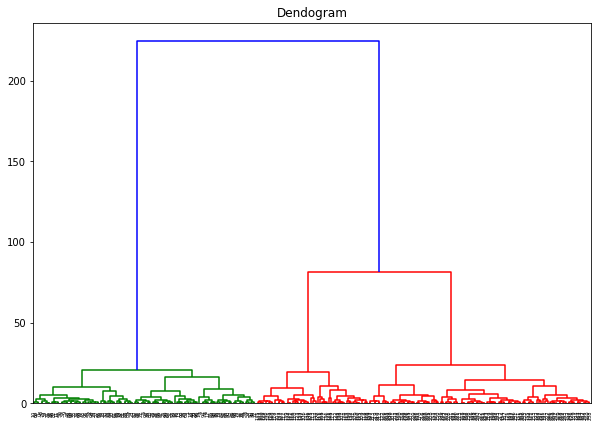

In [127]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(shc.linkage(combine_df.values, method='ward',metric='euclidean'))

### 13. Recreate the dendrogram for last 12 merged clusters 

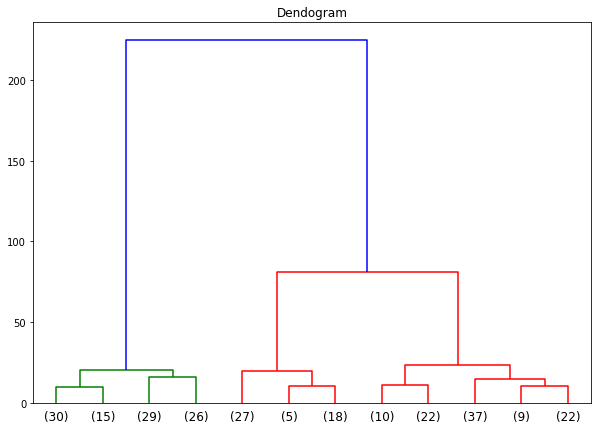

In [128]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(shc.linkage(combine_df.values, method='ward',metric='euclidean'),truncate_mode='lastp',p=12)

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. Using this distance measure and AgglomerativeClustering() function to cluster the data into 3 different groups

In [129]:
from sklearn.cluster import AgglomerativeClustering

In [130]:
ac = AgglomerativeClustering(n_clusters=3)

In [132]:
combine_df['Cluster_3'] = ac.fit_predict(combine_df.values)

In [134]:
combine_df.Cluster_3.unique()

array([1, 2, 0], dtype=int64)

In [135]:
combine_df.sample(10)

,0,1,Cluster_3
1,9.990457,20.829815,0
51,12.421241,-1.573835,1
18,1.335150,17.701331,2
95,10.727754,21.676053,0
13,-1.887345,24.368943,2
59,13.608445,-0.589355,1
74,11.180997,0.432610,1
40,0.650081,20.715285,2
65,10.043529,-0.744176,1
99,8.496471,1.689564,1


### 15. Use matplotlib to visually observe the clusters in 2D space 

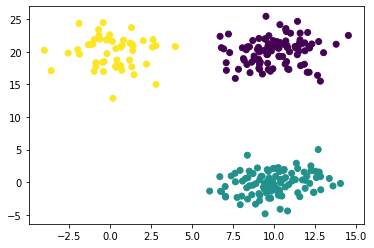

In [152]:
plt.figure()
plt.scatter(x=combine_df[0],y=combine_df[1],c=combine_df['Cluster_3'])